# Papers Analysis


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Setting `matplotlib` parameters


In [2]:
plt.rcParams["figure.figsize"] = [12, 6]

Read the data


In [3]:
df_paper = pd.read_csv("paper.csv")
df_nep = pd.read_csv("nep.csv")
df_nep_inclusion = pd.read_csv("nep_inclusion.csv")
df_nep_issue = pd.read_csv("nep_issue.csv")
df_authorship = pd.read_csv("authorship.csv")

/opt/hostedtoolcache/Python/3.10.4/x64/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (1,2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


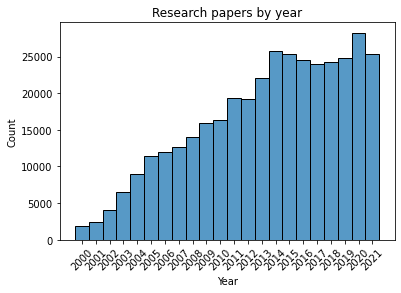

In [4]:
min_year = 2000
max_year = 2021
sns.histplot(data = df_paper.year[df_paper.year.between(min_year, max_year)], discrete = 1)
plt.title("Research papers by year")
plt.xlabel("Year")
plt.xticks(range(min_year, max_year + 1, 1), rotation = 45)
plt.show()

In [5]:
(pd.DataFrame(df_paper.groupby('institution')
.count()
.title.sort_values(ascending = False))
.rename(columns={'title': 'count'})
.head(10)
.style.set_caption("Top 10 institutions by published papers")
)

,count
institution,
"University Library of Munich, Germany",30244
"National Bureau of Economic Research, Inc",20013
Institute of Labor Economics (IZA),14176
HAL,11608
C.E.P.R. Discussion Papers,10720
arXiv.org,9386
Agricultural and Applied Economics Association,5118
The World Bank,4689
CESifo,4135


In [6]:
df_pa = df_paper.merge(df_authorship, left_on='pid', right_on='paper__pid', how='left')
df_pa.author__aid = df_pa.author__aid.str.replace(':', ' ').str.title()

In [7]:
(pd.DataFrame(df_pa.groupby('author__aid')
.count()
.title.sort_values(ascending = False))
.rename(columns={'title': 'count'})
.head(10)
.style.set_caption("Top 10 authors by published papers")
)

,count
author__aid,
Asongu Simplice,1491
Fund International Monetary,926
Bank World,828
Gupta Rangan,757
Mcaleer Michael,648
Oecd,466
Tol Richard,385
Odhiambo Nicholas,330
Chang Chia-Lin,306


In [8]:
num_authors = (pd.DataFrame(df_pa.groupby('pid')
.count()
.title.sort_values(ascending = False))
.rename(columns={'title': 'count'})
.value_counts()
)

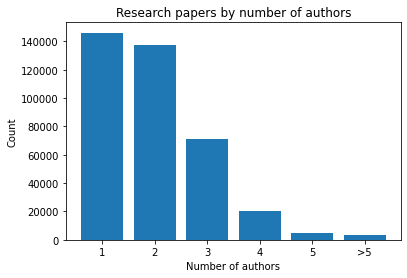

In [9]:
num_top = 5
height = list(num_authors[:num_top].values) + [num_authors[num_top:].sum()]
bars = list(range(1, num_top + 1)) + [f'>{num_top}']
y_pos = range(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("Research papers by number of authors")
plt.xlabel("Number of authors")
plt.ylabel("Count")
plt.show()

In [10]:
pd.DataFrame(df_pa.groupby('author__aid')
.institution
.nunique()
.sort_values(ascending = False)
.head(10)
).style.set_caption('Top 10 authors affilieated with the most institution')

,institution
author__aid,
Ongena Steven,47
Peri Giovanni,40
Eichengreen Barry,39
Ottaviano Gianmarco,39
Devereux Michael,39
Clark Andrew,37
Verdier Thierry,37
Pesaran M,37
Cabrales Antonio,36
